In [24]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.utils import to_categorical

import numpy as np
np.random.seed(0)

import matplotlib.pyplot as plt

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, X_test.shape

11493376/11490434 [==============================] - 2s 0us/step


((60000, 28, 28), (10000, 28, 28))

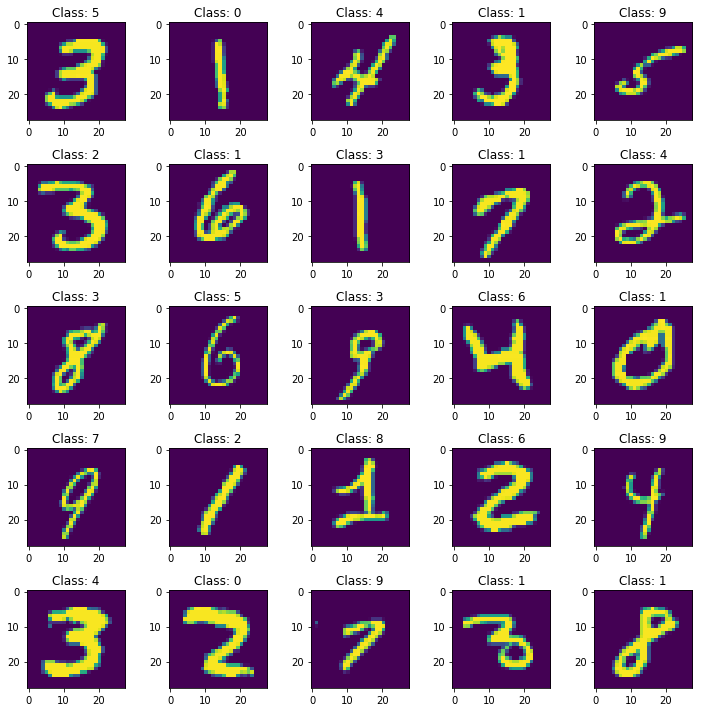

In [12]:
plt.figure(figsize=(10, 10))
for idx in range(25):
    plt.subplot(5, 5, idx+1)
    plt.imshow(X_train[idx+7])
    plt.title('Class: {}'.format(y_train[idx]))
plt.tight_layout()

In [14]:
img_rows, img_cols = X_train.shape[1], X_train.shape[2]

X_train = X_train.reshape(-1, img_rows, img_cols, 1)
X_test = X_test.reshape(-1, img_rows, img_cols, 1)

input_shape = (img_rows, img_cols, 1)

X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [19]:
if np.max(X_train) > 1: X_train = X_train / 255
if np.max(X_test) > 1: X_test = X_test / 255

In [27]:
if len(y_train.shape) == 1:
    num_classes = len(set(y_train))
    y_train = to_categorical(y_train, num_classes)
    y_test = to_categorical(y_test, num_classes)

In [34]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), input_shape=input_shape),
    MaxPool2D(pool_size=(2,2)),
    
    Conv2D(filters=64, kernel_size=(3,3)),
    MaxPool2D(pool_size=(2,2)),
    
    Flatten(),
    
    Dense(512, activation='relu'),
    Dense(num_classes, activation='softmax')
    
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=3,
    validation_data=(X_test, y_test)
)

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 62s 1ms/step - loss: 0.1634 - acc: 0.9523 - val_loss: 0.0500 - val_acc: 0.9840
Epoch 2/3
60000/60000 [==============================] - 55s 913us/step - loss: 0.0443 - acc: 0.9864 - val_loss: 0.0441 - val_acc: 0.9849
Epoch 3/3
60000/60000 [==============================] - 55s 922us/step - loss: 0.0275 - acc: 0.9912 - val_loss: 0.0377 - val_acc: 0.9878


In [36]:
score = model.evaluate(X_test, y_test, verbose=0)

In [37]:
score

[0.037699470782961, 0.9878]